## Employee Attrition Prediction Model

This model predicts if an employee is likely to leave the company based on certain conditions.

## Work Flow
1. Data Exploration (EDA)
2. Data Cleaning, Transformation and Feature Selection
3. Model Comparison
4. Pipeline Creation (transformer, preprocessor, model training and tuning)
3. Model Evaluation
4. Feature Importance


### 1. Data Exploration

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the data
df_attrition = pd.read_excel("dataset/hr_attrition.xlsx")
df_attrition.head(3)

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0


In [3]:
# set options to see all columns
pd.set_option('display.max.columns', 40)
df_attrition.head(3)

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,41,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,49,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,37,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0


In [4]:
# Check datatypes and table info
df_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [5]:
df_attrition.isna().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performance Rating            0
Relationship Satisfaction     0
Standard

### 2. Data Cleaning, Transformation and Feature Selection

In [6]:
from sklearn.preprocessing import OneHotEncoder

# drop unnecessary and unwanted features
df_attrition.drop(['CF_attrition label', # similar to label
                   'emp no', # high cardinality
                   'Employee Number', # high cardinality
                   'Over18', # only one value
                   'CF_current Employee', # sames as label
                   'Daily Rate', # wrong values, monthly income exists
                   'Employee Count', # same values
                   'Hourly Rate',# wrong values, monthly income exists
                   'Monthly Rate'], # wrong values, monthly income exists
                  axis = 1, inplace=True)
    
# convert attrition to binary before ontencoding
df_attrition['Attrition'] = df_attrition['Attrition'].apply(lambda x: 1 if x=="Yes" else 0)

categorical_features = df_attrition.select_dtypes(include='object')

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(categorical_features)
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_features.columns))

# drop objects features
numeric_df = df_attrition.drop(categorical_features, axis=1)

# merge encoded and numeric df
merged_df = pd.concat([numeric_df, encoded_df], axis=1)
merged_df.head(3)

,Attrition,Training Times Last Year,Age,Distance From Home,Environment Satisfaction,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,...,Gender_Male,Job Role_Healthcare Representative,Job Role_Human Resources,Job Role_Laboratory Technician,Job Role_Manager,Job Role_Manufacturing Director,Job Role_Research Director,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Over Time_No,Over Time_Yes,Education_Associates Degree,Education_Bachelor's Degree,Education_Doctoral Degree,Education_High School,Education_Master's Degree
0,1,0,41,1,2,3,2,4,5993,8,11,3,1,80,0,8,1,6,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0,3,49,8,3,2,2,2,5130,1,23,4,4,80,1,10,3,10,7,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,37,2,4,2,1,3,2090,6,15,3,2,80,0,7,3,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


#### Feature Selection and Dimensionality Reduction

In [7]:
#  get correlated features
corr_df = merged_df.corr()['Attrition'].abs().sort_values(ascending=False)

# filter out features with coef < 0.01 and = 1.0
corr_df = corr_df[(corr_df > 0.01) & (corr_df != 1)]
corr_df

Over Time_No                          0.246118
Over Time_Yes                         0.246118
Marital Status_Single                 0.175419
Total Working Years                   0.171063
Job Level                             0.169105
CF_age band_Under 25                  0.166623
Years In Current Role                 0.160545
Monthly Income                        0.159840
Age                                   0.159205
Job Role_Sales Representative         0.157234
Years With Curr Manager               0.156199
Stock Option Level                    0.137145
Years At Company                      0.134392
Job Involvement                       0.130016
CF_age band_35 - 44                   0.118492
Business Travel_Travel_Frequently     0.115143
Job Satisfaction                      0.103481
Environment Satisfaction              0.103369
Job Role_Laboratory Technician        0.098290
Marital Status_Married                0.090984
Job Role_Research Director            0.088870
Marital Statu

### 3. Model Comparison
We would test 3 classification models and tune the model with the best score.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = merged_df[list(corr_df.index)]
y = merged_df['Attrition']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model dictionary
models = {"Logistic Regression": LogisticRegression(),
             "RandomForestClassifier": RandomForestClassifier(),
              "KNeighborsClassifier": KNeighborsClassifier()
             }

# Create a function to train and score the models
def fit_score(model, X_train, X_test, y_train, y_test):
    # create empty dict
    model_score = {}
    # use key value
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9013605442176871,
 'RandomForestClassifier': 0.9047619047619048,
 'KNeighborsClassifier': 0.8639455782312925}

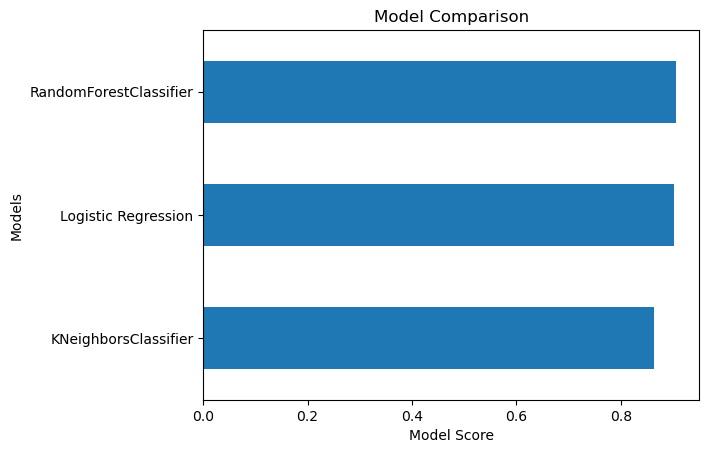

In [9]:
# Visualize the data
pd.DataFrame(model_scores.items()).set_index(0).sort_values(1,ascending=True).plot.barh(title="Model Comparison",
                                                                                       xlabel="Model Score",
                                                                                       ylabel="Models",
                                                                                       legend=False);

### 4. Pipeline Creation, Fitting and Hyperparameter Tuning

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle

# create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# hyperparameter tuning
param_grid = {
    'classifier__n_estimators':np.arange(10, 300, 20),
    'classifier__max_depth':[None, 10, 20, 30],
    'classifier__min_samples_split': np.arange(2, 10, 2),
    'classifier__min_samples_leaf': np.arange(1, 10, 2)
}

# initialize grid seearch cv
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# evaluate model
print(f"Best params: {grid_search.best_params_}")
print(f"Best score on test data: {grid_search.best_estimator_.score(X_test, y_test)}")

# save the model
pickle.dump(grid_search.best_estimator_, open("model/emp-attrition-prediction.pkl","wb"))

Best params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 110}
Best score on test data: 0.9013605442176871


### 4. Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# load model
model = pickle.load(open("model/emp-attrition-prediction.pkl", "rb"))

# run predictions
y_preds = model.predict(X_test)

# print results
print(f"Accuracy Score : {accuracy_score(y_test, y_preds)}")
print(f"Confusion Matrix : {accuracy_score(y_test, y_preds)}")
print(f"Classification Report : {accuracy_score(y_test, y_preds)}")

Accuracy Score : 0.9013605442176871
Confusion Matrix : 0.9013605442176871
Classification Report : 0.9013605442176871


### 5. Feature Importance
Get the features that contribute the most to the predictions and try to reduce the data.

In [20]:
feature_importance = dict(zip(model.feature_names_in_, model.named_steps['classifier'].feature_importances_))
feature_importance

{'Over Time_No': 0.03359750412694492,
 'Over Time_Yes': 0.04185959501634605,
 'Marital Status_Single': 0.017989395639403608,
 'Total Working Years': 0.05123376196974411,
 'Job Level': 0.01893707475947773,
 'CF_age band_Under 25': 0.008287089524085717,
 'Years In Current Role': 0.02883884642700531,
 'Monthly Income': 0.07752417910886222,
 'Age': 0.06328156779181737,
 'Job Role_Sales Representative': 0.007666124869248829,
 'Years With Curr Manager': 0.03161863947410018,
 'Stock Option Level': 0.031198219772963835,
 'Years At Company': 0.04346932739135462,
 'Job Involvement': 0.029027959165405848,
 'CF_age band_35 - 44': 0.009588422459039795,
 'Business Travel_Travel_Frequently': 0.014201534365389757,
 'Job Satisfaction': 0.03025420938220055,
 'Environment Satisfaction': 0.03247255181129729,
 'Job Role_Laboratory Technician': 0.01143468815853369,
 'Marital Status_Married': 0.009917925908512929,
 'Job Role_Research Director': 0.0009731962687381633,
 'Marital Status_Divorced': 0.00574742512

In [26]:
features_importance_df = pd.DataFrame(feature_importance, index=[0]).T.sort_values(0, ascending=False)
features_importance_df

,0
Monthly Income,0.077524
Age,0.063282
Total Working Years,0.051234
Distance From Home,0.047450
Years At Company,0.043469
Percent Salary Hike,0.042828
Over Time_Yes,0.041860
Num Companies Worked,0.036254
Over Time_No,0.033598
Environment Satisfaction,0.032473


We could select the top 20 - 30 feature importances and fit it to a new instance of the model and see if we would get a good score before deploying it to production. We would stop here for demo purposes.